In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = sns.load_dataset("titanic")[['survived', 'sex', 'age', 'sibsp', 'parch', 'fare']]
df.head()

,survived,sex,age,sibsp,parch,fare
0,0,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,1,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,0,male,35.0,0,0,8.0500


In [ ]:
#Eliminate NA without mercy
print("Original length of daataframe: ", len(df))
df.dropna(inplace = True)
print("Length of df after dropping na values: ", len(df))

Original length of daataframe:  891
Length of df after dropping na values:  714


Q1:  8.05
Q3:  33.375
LF:  -29.937499999999996
UF:  71.3625


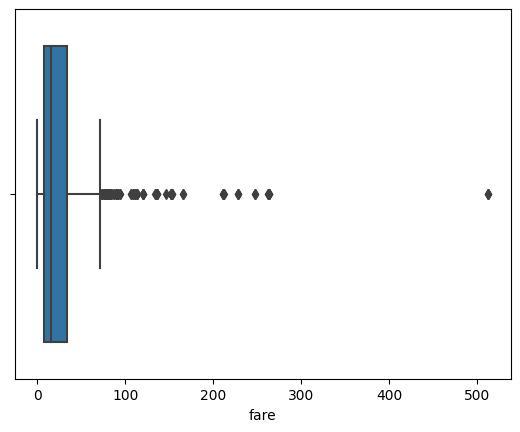

In [ ]:
#Eliminate outliers.
#Check presence of outliers
#IQR = interquartile range = amount of data spread in the middle of a dataset
sns.boxplot(x = df['fare'])
quantile1 = df['fare'].quantile(0.25)
quantile3 = df['fare'].quantile(0.75)
IQR = quantile3 - quantile1

print("Q1: ", quantile1)
print("Q3: ", quantile3)

#Any data point below LF or UF is considered a potential outlier.
#These are values that are significantly different from the majority of the data.
lower_inner_fence = quantile1 - 1.5*IQR
upper_inner_fence = quantile3 + 1.5*IQR

print("LF: ", lower_inner_fence)
print("UF: ", upper_inner_fence)

Original length of df:  714
Number of outliers:  94
Length of dataframe after dropping outliers:  620


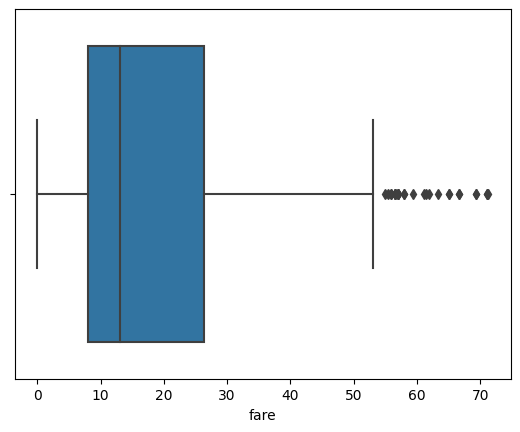

In [ ]:
#Using the boundaris LF and UF to eliminate outliers
print("Original length of df: ", len(df))

outliers_index = df[(df['fare'] < lower_inner_fence) | (df['fare'] > upper_inner_fence)].index
df.drop(outliers_index, inplace = True)
sns.boxplot(x = df['fare'])

print("Number of outliers: ", len(outliers_index))
print("Length of dataframe after dropping outliers: ", len(df))

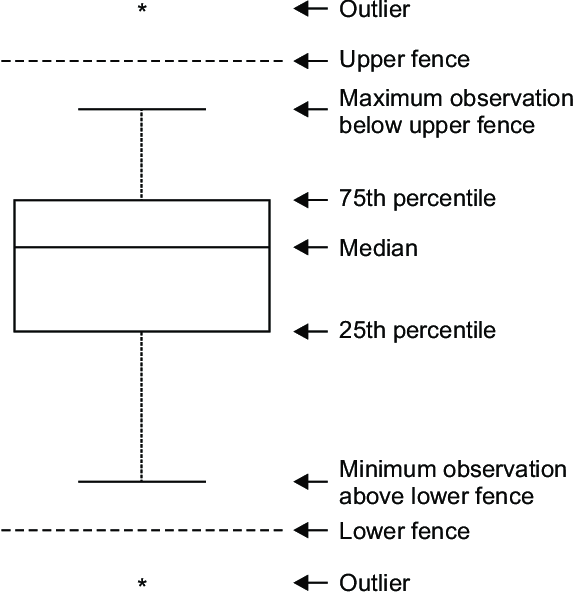

In [ ]:
#Data reduction by combining two closely related columns
df['kin'] = df['sibsp'] + df['parch']

df.drop(['sibsp', 'parch'], axis = 1, inplace = True)
df.head()

,survived,sex,age,fare,kin
0,0,male,22.0,7.2500,1
1,1,female,38.0,71.2833,1
2,1,female,26.0,7.9250,0
3,1,female,35.0,53.1000,1
4,0,male,35.0,8.0500,0


In [ ]:
#One hot encoding to convert nominal gender into numerical
one_hot = pd.get_dummies(df['sex'])
df.drop('sex', axis = 1, inplace = True)
df = df.join(one_hot)
df.head()

,survived,age,fare,kin,female,male
0,0,22.0,7.2500,1,0,1
1,1,38.0,71.2833,1,1,0
2,1,26.0,7.9250,0,1,0
3,1,35.0,53.1000,1,1,0
4,0,35.0,8.0500,0,0,1


In [ ]:
#Min-max normalizaton is done

df = (df-df.min())/(df.max()-df.min())
df.head()

,survived,age,fare,kin,female,male
0,0.0,0.271174,0.101707,0.142857,0.0,1.0
1,1.0,0.472229,1.000000,0.142857,1.0,0.0
2,1.0,0.321438,0.111176,0.000000,1.0,0.0
3,1.0,0.434531,0.744915,0.142857,1.0,0.0
4,0.0,0.434531,0.112930,0.000000,0.0,1.0
